In [1]:
import sympy
sympy.init_printing()

# Atomic wheight of Argon

In [ ]:
# Avogadro constant
N_A = 6.02214076 * 10**23 # 1 / mol

# Wheight of one mole of Argon
M = 39.88 / 1000 # kg / mol

# mass of one atom in kg
m = M / N_A
m

# Sackur-Tetrode equation

$$
  C_1 = \frac{5}{2} + \frac{3}{2} \, \log \biggl( \frac{4 \, \pi \, m}{3 \, h^2} \biggr)
$$

$$
  S(U, \, V, \, N) = 
  N \, k_B \, 
  \ln \Biggl(
    \left( \frac{V}{N} \right) 
    \left( \frac{U}{N} \right)^{\frac{3}{2}}
  \Biggr) +
  N \, k_B \, C_1
$$

In [42]:
#k_B = sympy.Symbol('k_B', real=True, positive=True)
from sympy.abc import U, V, N, h, m

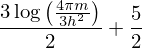

In [73]:
C1 = sympy.Rational(5,2) + sympy.Rational(3,2) * sympy.log((4 * sympy.pi * m) / (3 * h**2))
C1

In [52]:
C1 = sympy.Symbol('C_1', rational=True, positive=True)

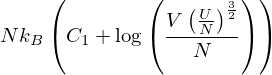

In [53]:
# Sackur-Tetrode S(U, V, N)
S = N * k_B * (sympy.log((V / N) * (U / N)**sympy.Rational(3,2)) + C1)
S

## equations of state

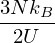

In [54]:
# (1 / T)
S.diff(U)

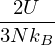

In [55]:
# temperature T
T = 1 / S.diff(U)
T

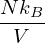

In [56]:
# (p / T)
S.diff(V)

In [57]:
# pressure p
p = T * S.diff(V)
p

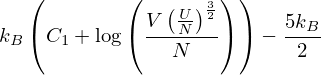

In [61]:
# (-μ/T)
S.diff(N)

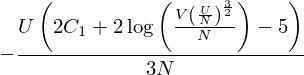

In [59]:
# chemical potential μ
μ = -T * S.diff(N)
μ.simplify()

In [62]:
print(sympy.pycode(S.diff(N)))

k_B*(C_1 + math.log(V*(U/N)**(3/2)/N)) - 5/2*k_B


# Sackur-Tetrode equation solved for U

$$
  C_1 = \frac{5}{2} + \frac{3}{2} \, \log \biggl( \frac{4 \, \pi \, m}{3 \, h^2} \biggr)
$$

$$
  U(S, \, V, \, N) = 
  N \left(
  \frac{N}{V} \, \exp \Bigl( \frac{S}{N \, k_B} - C_1 \Bigr)
  \right)^\frac{2}{3}
$$

In [66]:
S = sympy.Symbol('S', rational=True, positive=True)
V = sympy.Symbol('V', rational=True, positive=True)
N = sympy.Symbol('N', rational=True, positive=True)
k_B = sympy.Symbol('k_B', rational=True, positive=True)
C1 = sympy.Symbol('C_1', rational=True, positive=True)

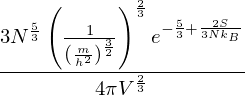

In [74]:
U = N * ((N / V) * sympy.exp(S / (k_B * N) - C1))**sympy.Rational(2,3)
U

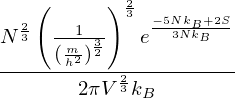

In [75]:
# temperature T
T = U.diff(S)
T.simplify()

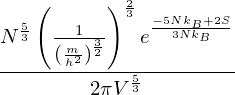

In [76]:
# pressure p
p = -U.diff(V)
p.simplify()

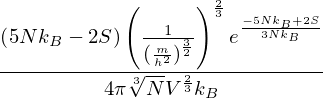

In [77]:
# chemical potential μ
μ = (U.diff(N)).simplify()
μ

In [72]:
print(sympy.pycode(μ))

(1/3)*(5*N*k_B - 2*S)*math.exp((2/3)*(-C_1*N*k_B + S)/(N*k_B))/(N**(1/3)*V**(2/3)*k_B)


# Tests

In [1]:
from ideal_gas import *

In [15]:
T1 = 273.15 # standard temperature
V1 = 1.0
N1 = 2.66e25 # adjusted this until close to standard pressure (1 bar)
U1 = U2(T1, V1, N1)
S1 = S(U1, V1, N1)

In [16]:
U_p(S1, V1, N1) * 1e-5

1.0031505697710061

In [17]:
F_p(T1, V1, N1) * 1e-5

1.003150569771

In [18]:
S_p(U1, V1, N1) * 1e-5

1.003150569771

In [19]:
N1 * m

1.7615131267705542

This is close to the density of argon at STP: $1.784 \, \mathrm{kg} / \mathrm{m}^3$

In [20]:
U(S1, V1, N1) - U2(T1, N1)

-2.0372681319713593e-10

# derivation of Helmholtz free energy

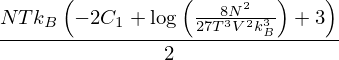

In [22]:
import sympy
sympy.init_printing()

# declare symbols
S = sympy.Symbol('S', rational=True, positive=True)
V = sympy.Symbol('V', rational=True, positive=True)
N = sympy.Symbol('N', rational=True, positive=True)
T = sympy.Symbol('T', rational=True, positive=True)
k_B = sympy.Symbol('k_B', rational=True, positive=True)
C1 = sympy.Symbol('C_1', rational=True, positive=True)

# Sackur-Tetrode equation solved for U
U = N * ((N / V) * sympy.exp(S / (k_B * N) - C1))**sympy.Rational(2,3)

# thermodynamic equation of state for temperature 
temperature = U.diff(S)

# solve state equation for entropy
# note: temperature = T <=> temperature - T = 0
entropy = sympy.solve(temperature - T, S)[0]

# eliminate S in U(S, V, N) to obtain the energy in terms of (T, V, N)
energy = U.subs(S, entropy)

# Helmholtz free energy
free_energy = (energy - T * entropy).simplify()

free_energy

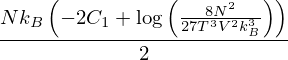

In [36]:
S = (free_energy.diff(T)).simplify()
S

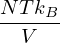

In [35]:
p = -(free_energy.diff(V)).simplify()
p

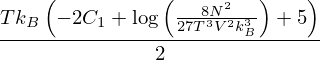

In [37]:
μ = (free_energy.diff(N)).simplify()
μ

In [39]:
print(sympy.pycode(μ))

(1/2)*T*k_B*(-2*C_1 + math.log((8/27)*N**2/(T**3*V**2*k_B**3)) + 5)
